In [104]:
import pandas as pd
data=pd.read_csv('D:\\PGP-BABI\\Capstone\\Airbnb\\Tasmania-detailed reviews.csv', error_bad_lines=False)
#data=pd.read_csv('D:\\PGP-BABI\\Capstone\\Airbnb\\Clustering\\final_merged.csv', error_bad_lines=False)
data_text = data[['Summary+space']]
data_text['index'] = data_text.index
data_text
documents = data_text

C:\Users\malavika.suresh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
documents

,comments,index
0,Yvette picked us up from the bus stop on our a...,0
1,"Lovely house with beautiful views, close to th...",1
2,Yvette is a generous host and a georgeous pers...,2
3,This is our first experience with Air B & B; a...,3
4,Yvette is a very friendly host and happy to gi...,4
5,Yvette was so welcoming and lovely. We really ...,5
6,We had a fantastic time staying with Yvette. W...,6
7,We loved staying with Yvette is her georgeous ...,7
8,We had a lovely stay for 1 night at Yvette's p...,8
9,It was a really relaxed hassle free experience...,9


In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet') #This is one time
from nltk.util import ngrams
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
#nltk.download('stopwords') #This is one time
#nltk.download('punkt') #This is one time
from nltk.tokenize import sent_tokenize

from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
from sklearn import cluster
from sklearn import metrics

import datetime

from sklearn.decomposition import PCA
from matplotlib import pyplot

import gensim.corpora as corpora

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\malavika.suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malavika.suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malavika.suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
#def lemmatize_stemming(text):
#    stemmer = PorterStemmer()
#    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def preprocess_sentence(text):
    result = []
    text=repr(text) # Remove non-unicode characters
    text=((text.encode('ascii','ignore')).decode("utf-8")).lower()
    
    # Remove new line characters
    text = text.replace("\\r\\n", " ")
    
    # Remove basic stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)  
    text = [w for w in word_tokens if not w in stop_words]
    text = (''.join([w+' ' for w in text])).strip()
    
    #Sentence tokenization
    for token in sent_tokenize(text):
        temp=[]
        
        # Remove punctuation
        table=str.maketrans('', '', string.punctuation) #Think about stuff like "pre-defined"
        token = [w.translate(table) for w in token]
        token = (''.join([w for w in token])).strip()
        
        #Word tokenization
        tokenized_words=word_tokenize(token)
        #temp1 = (' '.join([lemmatize_stemming(w) for w in tokenized_words])).split()
        #result.append(temp1)
        
        #extracting only distinct words
        tokenized_words = list(set(tokenized_words))
        
        #Lemmatization and POS tagging - Extract only Nouns and Adjectives
        allowed_postags=['NOUN', 'ADJ']
        doc = nlp(" ".join(tokenized_words)) 
        #for doc in nlp.pipe(" ".join(tokenized_words), batch_size=10000, n_threads=3):
            #pass
        result.append([t.lemma_ for t in doc if t.pos_ in allowed_postags])            
        
    return result

In [107]:
test_text=documents['Summary+space'][2]
print(documents['Summary+space'][2])
print(preprocess_sentence(test_text))

Kentisbury Country House is a gorgeous, self catering rural retreat, ideal for romantic couples, families and groups of up to nine friends. A perfect base for exploring Cradle Mountain National Park and the North Coast of Tasmania. Kentisbury Country House is ideally situated to explore Cradle Mountain National Park. The property is situated in quiet, rural surroundings, perfect for a relaxing break. The luxurious, European style house has three queen bedrooms, a sofa bed plus three single roll away beds, two bathrooms, full kitchen and dining area, two living rooms, one of which is a stunning rotunda room. There are numerous choices for dining outdoors, on the large deck with views to Lake Barrington, under the birch trees or perhaps under the rose arbour. Our guests are welcome to share the seasonal produce from our organic vegetable garden and fruit trees.
[['rural', 'couple', 'ideal', 'friend', 'romantic', 'gorgeous', 'self', 'family', 'kentisbury', 'house', 'country', 'group'], ['

In [108]:
processed_sent = documents['Summary+space'].map(preprocess_sentence)
processed_sent[2]

[['rural',
  'couple',
  'ideal',
  'friend',
  'romantic',
  'gorgeous',
  'self',
  'family',
  'kentisbury',
  'house',
  'country',
  'group'],
 ['tasmania',
  'mountain',
  'perfect',
  'north',
  'cradle',
  'park',
  'coast',
  'base',
  'national'],
 ['mountain', 'cradle', 'park', 'kentisbury', 'house', 'country', 'national'],
 ['rural', 'break', 'quiet', 'relaxing', 'property', 'perfect'],
 ['full',
  'roll',
  'bed',
  'luxurious',
  'european',
  'house',
  'stunning',
  'bedroom',
  'sofa',
  'style',
  'rotunda',
  'queen',
  'bathroom',
  'dining',
  'room',
  'bed',
  'kitchen',
  'room',
  'single',
  'area'],
 ['dining',
  'tree',
  'choice',
  'birch',
  'arbour',
  'view',
  'large',
  'deck',
  'numerous'],
 ['tree',
  'garden',
  'welcome',
  'produce',
  'organic',
  'vegetable',
  'fruit',
  'seasonal',
  'guest']]

In [109]:
processed_sent_final=[];
for i in processed_sent:
    for a in i:
        processed_sent_final.append(a)

In [64]:
processed_sent_final[17]
#processed_sent_final[2][:2]

['sofa', 'bed']

In [110]:
# Create Dictionary
id2word = corpora.Dictionary(processed_sent_final)

In [111]:
#len(id2word)
with open('D:\\PGP-BABI\\Capstone\\Airbnb\\Clustering\\sumspace_dict_spaCy.csv', 'w') as fp:
    fulldictionary=[fp.write(id2word[i]+","+str(id2word.dfs[i])+"\n") for i in range(0,len(id2word)-1)]

In [39]:
len(processed_sent_final)
z = 0
for i in processed_sent_final:
    for x in i:
        z = z + 1
print(z)

3006138


In [124]:
# training model
model = Word2Vec(processed_sent_final, min_count=50, window=3)
#Try different parameter values, size, sg=1 (this is more accurate) , window

In [125]:
# get vector data
X = model[model.wv.vocab]
#print (X)

C:\Users\malavika.suresh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [22]:
print (model.most_similar(positive=['food'], negative=[], topn=10))
print (model.similarity('food', 'breakfast'))

C:\Users\malavika.suresh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('grocery', 0.6475470066070557), ('dinner', 0.5814264416694641), ('provision', 0.5801143646240234), ('meal', 0.5661178827285767), ('supply', 0.5397285223007202), ('coffee', 0.5367319583892822), ('restaurant', 0.5188125371932983), ('delicious', 0.5143728852272034), ('local', 0.501193106174469), ('store', 0.4941306710243225)]


C:\Users\malavika.suresh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.46994984


In [ ]:
print (model['food'])

In [126]:
#print (list(model.wv.vocab))
print (len(list(model.wv.vocab)))

906


In [127]:
model.wv.save_word2vec_format('model_sumspace_CBOW_s100_w3_mc50.txt', binary=False)

In [53]:
print(pyplot.rcParams["figure.figsize"])
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
pyplot.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


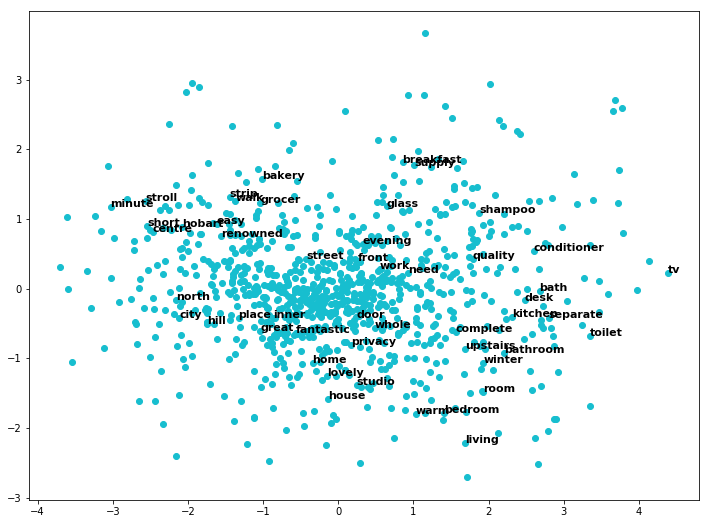

In [128]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color = 'tab:cyan')
words = list(model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), weight='bold', size = 11)
pyplot.show()

In [132]:
print(datetime.datetime.now())
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print(datetime.datetime.now())

2019-04-07 17:58:37.022478
2019-04-07 17:58:53.805306


In [55]:
print (assigned_clusters)

[0, 1, 0, 1, 2, 4, 3, 0, 0, 2, 4, 2, 2, 4, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 4, 4, 2, 3, 1, 1, 1, 1, 0, 3, 4, 2, 3, 3, 3, 1, 1, 2, 1, 3, 2, 3, 1, 0, 4, 0, 3, 2, 3, 0, 2, 4, 4, 4, 2, 2, 1, 2, 0, 1, 4, 3, 1, 0, 0, 4, 4, 4, 4, 4, 3, 0, 1, 1, 4, 3, 3, 4, 4, 4, 1, 3, 1, 0, 3, 1, 4, 0, 0, 3, 3, 1, 0, 2, 3, 3, 1, 1, 3, 3, 4, 4, 1, 4, 1, 3, 3, 3, 0, 0, 3, 4, 0, 0, 4, 1, 4, 2, 2, 3, 1, 3, 2, 1, 3, 4, 2, 0, 2, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 2, 4, 1, 1, 0, 3, 0, 3, 3, 2, 3, 2, 2, 0, 3, 1, 4, 3, 4, 4, 4, 1, 2, 0, 4, 4, 3, 1, 4, 0, 2, 1, 3, 0, 4, 4, 1, 3, 0, 0, 3, 2, 4, 0, 0, 3, 2, 0, 1, 4, 4, 2, 3, 3, 4, 2, 0, 1, 4, 1, 0, 4, 0, 4, 0, 0, 1, 3, 4, 4, 4, 2, 4, 4, 4, 3, 0, 4, 0, 1, 1, 3, 4, 4, 1, 1, 4, 3, 2, 0, 3, 1, 2, 2, 4, 1, 4, 2, 4, 4, 3, 0, 0, 0, 4, 0, 0, 0, 1, 1, 2, 0, 2, 4, 0, 0, 0, 0, 4, 2, 3, 1, 3, 1, 0, 3, 1, 4, 3, 3, 1, 1, 1, 4, 2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 1, 2, 0, 0, 2, 1, 3, 3, 1, 4, 0, 4, 4, 1, 2, 3, 4, 1, 4, 3, 

In [25]:
words = list(model.wv.vocab)
#fileprint=[]
 
with open('D:\\PGP-BABI\\Capstone\\Airbnb\\Clustering\\review_cluster_SG_w3_mincount_spaCy_1000.csv', 'w') as fp:
    for i, word in enumerate(words): 
        fp.write((word + "," + str(assigned_clusters[i])+"\n"))


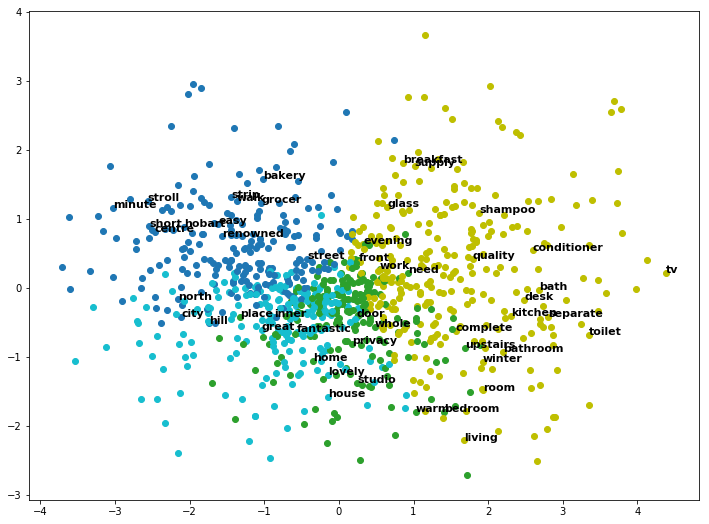

In [133]:
# create a scatter plot of the clusters
a = ['tab:cyan','tab:blue','tab:green','y','r']
for i, word in enumerate(words[:]):
    #if assigned_clusters[i]==4:
    pyplot.scatter(result[i, 0], result[i, 1], color = a[assigned_clusters[i]])
for i, word in enumerate(words[:50]):
#for i, word in enumerate(words[:]):
    #if assigned_clusters[i]==4:
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), weight='bold', size = 11)
pyplot.show()

In [37]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))


Cluster id labels for inputted data
[4 3 4 1 1 1 1 4 1 1 0 0 1 1 4 1 0 2 3 2 2 2 2 2 2 4 4 1 3 1 4 4 4 3 3 2 3
 3 3 3 1 4 4 4 1 1 1 1 1 0 1 1 1 1 3 1 3 1 1 0 1 1 1 1 4 3 1 3 1 1 1 3 4 1
 4 1 1 1 4 1 1 0 0 0 1 2 1 1 3 1 1 3 4 4 0 1 1 1 1 1 3 3 3 1 1 1 0 2 2 1 1
 3 4 1 3 1 4 4 1 1 2 4 1 1 1 2 3 1 1 1 2 2 1 2 1 1 1 4 4 1 1 1 1 0 3 0 1 0
 1 2 1 4 3 1 1 1 4 1 1 4 2 3 1 4 4 4 4 4 0 0 0 2 2 4 1 4 1 3 1 1 1 1 1 1 2
 0 1 0 1 2 1 1 4 0 0 1 3 0 4 1 3 1 4 1 1 3 1 4 1 1 0 0 4 4 1 4 4 2 0 0 0 1
 1 1 1 4 3 0 1 4 1 4 2 4 4 1 1 0 1 0 0 2 0 0 1 4 1 4 2 1 1 1 0 1 2 1 1 0 4
 3 1 1 1 1 2 0 0 0 1 2 4 4 4 0 4 4 4 2 3 1 1 0 1 4 4 4 4 1 1 1 2 1 2 4 1 2
 0 1 3 1 3 3 0 1 0 2 0 1 0 0 0 4 1 3 1 4 4 0 2 1 1 4 1 4 0 1 3 1 1 0 3 2 1
 1 1 1 0 0 1 2 2 1 1 4 1 1 3 2 1 1 1 4 4 0 4 1 1 2 1 0 4 1 4 1 2 3 3 3 3 1
 1 3 3 3 1 1 2 1 3 1 1 1 4 4 4 1 4 4 1 4 1 3 1 1 1 1 1 3 1 0 3 1 0 2 0 4 2
 2 4 1 4 4 1 3 0 1 1 4 4 4 2 2 1 0 0 1 3 1 1 1 1 1 1 0 1 4 0 1 2 4 4 4 3 3
 3 3 4]
Centroids data
[[ 1.72754392e-01  9.23324972e-02  1.4050

  -2.92545557e-02 -2.76537955e-01 -8.61285105e-02 -4.10629690e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-2623.7593


In [40]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.05271186


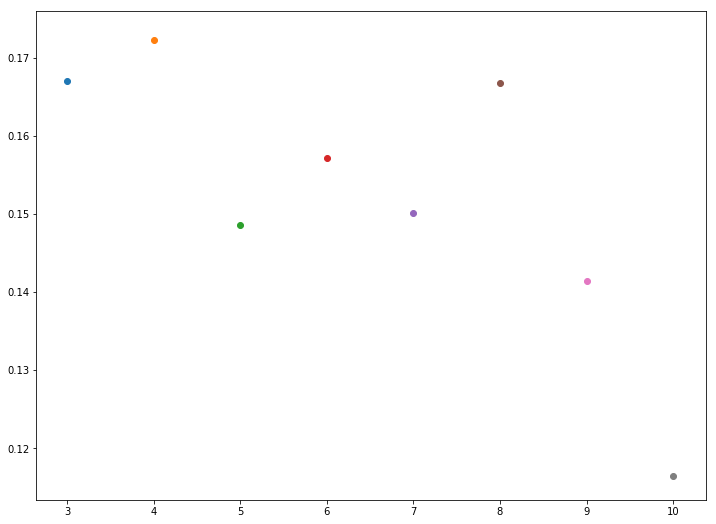

In [129]:
for i in range(3,11):
    NUM_CLUSTERS=i
    kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    pyplot.scatter(i,silhouette_score)
    words = list(model.wv.vocab) 
    with open('D:\\PGP-BABI\\Capstone\\Airbnb\\Clustering\\sumspace_cluster_CBOW_w3_spaCy_mincount_8_'+str(i)+'.csv', 'w') as fp:
        for i, word in enumerate(words): 
            fp.write((word + "," + str(assigned_clusters[i])+"\n"))
pyplot.show()